<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/2021-6-1-calculus3-ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Recap - Beregning og plot af tangente

Hvordan beregner og plotter vi (med de v√¶rkt√¶jer vi har indtil videre) tangenten for $x_0 = 0.5$ ?

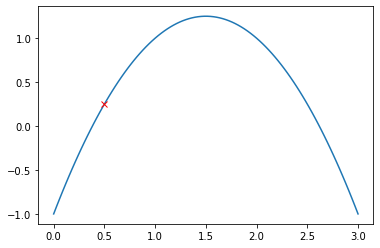

In [18]:
# Vores funktion som plot - same same...

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3, num=100)
y = -(x**2)+3*x-1

plt.plot(x,y)
plt.plot(0.5, 0.25, 'x', color='red')

In [3]:
# 1. bregening af y0
x0 = 0.5

y0 = -(x0**2)+3*x0-1

print(y0)

0.25


 Husk at vi kan beregne h√¶ldning i $x_0$ 
 
 $$a_s=\frac{y_2-y_1}{x_2-x_1}=\frac{f(x_0+h)-f(x_0)}{(x_0+h)-x_0}=\frac{f(x_0+h)-f(x_0)}{h}$$

 eller

 $$a_s=\frac{\Delta y}{h}=\frac{f(x_0+h)-f(x_0)}{h}$$

In [4]:
# opstilling af differenskvotient

from sympy import *

x0, h = symbols('x0, h')

f_x0 = -(x0**2)+3*x0-1

f_x0h = f_x0.subs(x0, x0+h)

In [5]:
f_x0

-x0**2 + 3*x0 - 1

In [6]:
f_x0h

3*h + 3*x0 - (h + x0)**2 - 1

In [7]:
# vi bruger lige m ikke, a_s
m = (f_x0h-f_x0)/h

In [8]:
m

(3*h + x0**2 - (h + x0)**2)/h

In [9]:
# tr√¶k h udenfor parantes. OK! :-)
factor(f_x0h-f_x0)

-h*(h + 2*x0 - 3)

In [10]:
# eller med hele differenskvotient
factor(m)

-h - 2*x0 + 3

In [11]:
# eller: brug gr√¶nsev√¶rdi udregning direkte

m_x0 = limit(m, h, 0)

In [12]:
m_x0

3 - 2*x0

In [13]:
m_x0.subs(x0, 0.5)

2.00000000000000

In [14]:
# tangent - super almindlig linear funktion fx: t = mx + b; Vi kan inds√¶tte fo x0 og y0

# 0.25 = 2*0.5 + b

b = 0.25 - 2*0.5
print(b)

-0.75


Dermed er vores tangent i $x_0:$ $t = 2x - 0.75$ og nu kan vi ogs√• plotte det

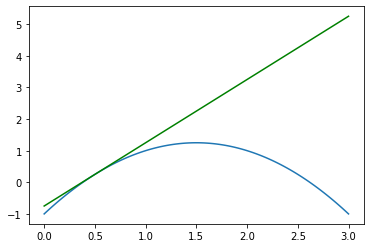

In [15]:
x = np.linspace(0, 3, num=100)
y = -(x**2)+3*x-1

plt.plot(x,y)

t = 2*x - 0.75

plt.plot(x,t, color='green')

### Calculus - Part 3 - Ekstreme punkter
####Del 3.1

I den sidste session l√¶rte vi, hvordan man bruger gr√¶nsev√¶rdier til at beregne det punkt, en funktion n√¶rmer sig, n√•r inputv√¶rdien n√¶rmer sig en bestemt v√¶rdi. Vi anvendte denne teknik til at beregne h√¶ldningen af tangentlinjen p√• et bestemt punkt p√• vores ikke-line√¶re funktion: $y=-(x^2)+3x-1$. Hvis I husker fra den f√∏rste calculus session, er vi interesseret i at finde det h√∏jeste punkt p√• denne kurve.

Hvis du nogensinde har vandret ud bjergene, vil du hvordan stien skr√•ner op, indtil man n√•r toppen. N√•r du f√∏rst er p√• toppen, g√•r alle stierne tilbage ned ad skr√•ningen. At forst√•, hvordan h√¶ldningen varierer i forskellige dele af en kurve, giver en nyttig synsvinkel til at bestemmelse det maksimale punkt p√• en kurve.

Vi starter med at opbygge en visuel intuition til, hvordan en funktions h√¶ldning og dens maksimale punkt er relateret. P√• billedet nedenfor har vi genereret to plot. Som $x$ varierer, visualiserer plottet til venstre, **hvordan tangentlinjen for kurven √¶ndres**, mens plottet til h√∏jre visualiserer, **hvordan h√¶ldningen af denne tangentlinje √¶ndres**.

In [ ]:
import IPython
iframe = '<iframe src="https://www.desmos.com/calculator/kxlspqhjaj" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)


#### Del 3.2
N√•r $x$ er mindre end $1.5$, er h√¶ldningen positiv. Som $x$ n√¶rmer sig $1.5$ fra venstre side falder h√¶ldningen og n√¶rmer sig $0$. Ved $x=1.5$, er h√¶ldningen af tangentlinjen n√∏jagtigt 0. N√•r vi h√¶ver $x$ forbi $1.5$ bliver tangentlinjens h√¶ldning mere og mere negativ. Det h√∏jeste punkt p√• vores kurve fungerer som en slags overgangspunkt fra positiv h√¶ldning til negativ h√¶ldning. Vi diskuterer dette n√¶rmere senere i denne mission. 

Ved at plotte m-v√¶rdiene for mange forskellige $x$ v√¶rdier, kan vi se, at de f√∏lger en lige linje. Denne linje kan beskrives som sin egen funktion og er kendt som **afledede funktion**. En funktions afledete kan fort√¶lle os h√¶ldningen af tangentlinjen for enhver $x$ v√¶rdi langs funktionen.

In [ ]:
iframe = '<iframe src="https://www.desmos.com/calculator/mqxu3c6nrf" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)



Indtil videre har vi l√∏st h√¶ldningen p√• bestemte punkter ved at inds√¶tte den specifikke $x$ v√¶rdi i h√¶ldningsligningen som udtrykt af gr√¶nsev√¶rdien. For at finde den generelle funktion, der beskriver h√¶ldningen til enhver tid, skal vi l√∏se gr√¶nsev√¶rdien ved hj√¶lp af den oprindelige variabel i stedet for at erstatte med en bestemt $x$ v√¶rdi.

Lad os f√∏rst starte med at omskrive h√¶ldningsligningen til den mere almindelige form. I stedet for at bruge $x_1$ og $x_2$ i h√¶ldningsligningen, bruger vi $x$ og $x + h$. Denne version af h√¶ldningsligningen er, hvordan de fleste l√¶reb√∏ger og ressourcer henviser til h√¶ldning:

$$\lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

I denne form repr√¶senterer $h$ afstanden mellem 2 punkter: $x$ og $h$. H√¶ldningen er v√¶rdien, gr√¶nsen n√¶rmer sig, som $h$ n√¶rmer sig $0$. Observer den f√∏lgende visualisering, for at f√• en bedre forst√•else for denne form for h√¶ldning. I n√¶ste afsnit kigger vi mere p√• at finde den afledede funktion. 

#### Del 3.3
Processen med at finde en funktions afledede funktion er kendt som **differentiering**. I stedet for at v√¶lge en bestemt $x$ v√¶rdi, efterlader vi $x$ hvor det er, og udvider ligningen for at l√∏se for den afledede. Ved at inds√¶tte $f(x) = x(x)^2 + 3x -1$, bliver det hele til: 

$\lim_{h \to 0} \frac{(-(x + h)^2 + 3(x + h) - 1) - (-(x)^2 + 3x - 1)}{h}$

Hvis vi forts√¶tter med at udvide ligningen til individuelle udtryk, f√•r vi:

$\lim_{h \to 0} \frac{-x^2 - 2xh - h^2 +3x + 3h - 1 + x^2 - 3x + 1}{h}$

Efter at annullere modsatte udtryk f√•r vi f√∏lgende ligning:

$\lim_{h \to 0} \frac{-2xh - h^2 + 3h}{h}$

N√•r vi fraregner $h$ i alle udtryk i t√¶lleren og n√¶vneren, f√•r vi:

$\lim_{h \to 0} \frac{h(-2x - h + 3)}{h}$

Hvis vi annullerer $h$ p√• b√•de t√¶lleren og n√¶vneren f√•r vi en defineret gr√¶nsev√¶rdi.

$\lim_{h \to 0} -2x - h + 3$

Vi kan nu l√∏se i det sidste trin ved at inds√¶tte, som vi s√• i den sidste session. Bem√¶rk, at resultatet af denne gr√¶nsev√¶rdi ikke vil v√¶re en enkelt v√¶rdi, men i stedet en ny funktion.




Bare en kort gennemgang (ikke noget nyt) af hvordan man kan g√∏re det i Sympy

In [19]:
# fra tangent-eksempel
f_x0

-x0**2 + 3*x0 - 1

In [20]:
f_x0h

3*h + 3*x0 - (h + x0)**2 - 1

In [23]:
# m = (f_x0h-f_x0)/h
m

(3*h + x0**2 - (h + x0)**2)/h

In [25]:
m.simplify()

-h - 2*x0 + 3

**√òvelse:**

* Forenkl ligningen ved at ids√¶tte direkte for at l√∏se gr√¶nsenv√¶rdien.

* Brug numpy.linspace() til at generere **110** v√¶rdier fra **-5** til **6** og gem det som **x**.
* Transformer **x** ved hj√¶lp af ligningen, du lige har l√∏st, og dem i **y**.
* Generer et linjediagram af **x** og **y**.



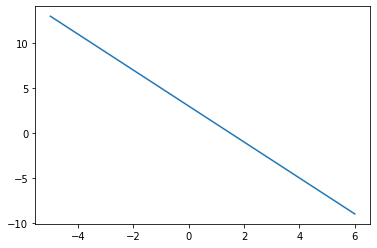

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 6, 110)
y = -2*x+3
plt.plot(x,y)

#### Del 3.4
Linjeplottet, vi lige lavede  matcher det set tidligere, der visualiserer, hvordan h√¶ldningen √¶ndrer sig for forskellige $x$ v√¶rdier. Vi bruger f√∏lgende notation til at specificere at $-2x +3$ er vores kurves afledede:

$y' = -2x + 3$

Det f√∏lgende er en alternativ form for at skriver det, som g√∏r det klart, at det afledede af $y$ er en funktion af $x$:

$f'(x) = -2x + 3$

Den sidste almindelige notation er f√∏lgende, som kan l√¶ses som "aflede ift. x er":

$\frac{d}{dx}[ -x^2 + 3x - 1 ] =  -2x + 3$

Tidligere s√• vi, hvordan h√¶ldningen ved $x = 1,5$ var $0$ og fungerede som et overgangspunkt fra positiv h√¶ldning til negativ h√¶ldning. Dette er formelt kendt som et **kritisk punkt**. P√• en funktions kritiske punkt er h√¶ldningen enten 0 eller udefineret. Ikke alle kritiske punkter fungerer dog som overgangspunkter for h√¶ldninger. Det f√∏lgende billede visualiserer h√¶ldningen for $y = x^3$ og giver mulighed at unders√∏ge, hvordan h√¶ldningen √¶ndres f√∏r og efter det kritiske punkt. I kan se, hvordan h√¶ldningen forbliver positiv f√∏r og efter det kritiske punkt.


In [ ]:
iframe = '<iframe src="https://www.desmos.com/calculator/8jtzsafbsz" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)

#### Del 3.5
Vi kan se hvordan h√¶ldningen ikke skifteder fra positiv til negativ p√• det kritiske punkt. Kritiske punkter er interessante for os, n√•r de repr√¶senterer **ekstreme v√¶rdier**. Ekstreme v√¶rdier kan opdeles i 2 kategorier - minimum og maksimum. Som vi s√• i starten af dorel√¶sningen, kan et kritisk punkt v√¶re en minimumsv√¶rdi, hvis h√¶ldningen g√•r fra negativ til positiv p√• det tidspunkt. N√•r h√¶ldningen overg√•r fra positiv til negativ p√• et punkt, kan det v√¶re en maksimal v√¶rdi. Hvis h√¶ldningen ikke "skifter" fortegn p√• et kritisk punkt, som ved $x = 0$ for $y = x^3$ i det sidste billede, kan det ikke v√¶re et minimum eller et maksimalt punkt.

En kurve kan have flere kritiske punkter og flere kandidater til minimums- og maksimumv√¶rdier. Den f√∏lgende kurve har 4 kritiske punkter, og alle 4 opfylder kriterierne for overgang af h√¶ldning fra positiv til negativ eller negativ til positiv. Lokale minima er tegnet ind.



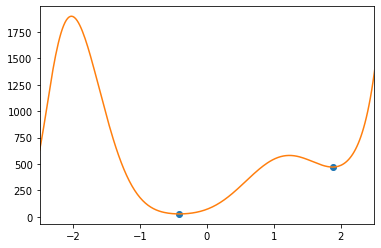

In [28]:
# !!!OBS!!!: avanceret kode og matematik bare til visualisering - ikke relevant / ikke del af pensum

import numpy as np
from matplotlib.pyplot import *

# define polynomial function
c = np.poly1d([2,-4,-28,62,122,-256,-196,140,392,240,72])

crit = c.deriv().r
r_crit = crit[crit.imag==0].real
test = c.deriv(2)(r_crit) 


# compute local minima 
# excluding range boundaries
x_min = r_crit[test>0]
y_min = c(x_min)
plot( x_min, y_min, 'o' )

xc = np.arange(-2.5, 2.6, 0.02)
yc = c(xc)
plot( xc, yc)

xlim([-2.5,2.5])
show()

Disse v√¶rdier er kendt som lokale ekstrema, da de er den laveste eller h√∏jeste v√¶rdi i intervallet omkring hvert punkt. Hvis et kritisk punkt er det laveste punkt i intervallet omkring det, er det kendt som et **relativt minimum**. Hvis det er det h√∏jeste punkt i kvarteret, er det kendt som et **relativt maksimum**.

Vi ved, at relative minimum og maksimum kan forekomme, n√•r h√¶ldningen er $0$. Derfor kan vi finde kritiske punkter ved hj√¶lp af aritmetik (i stedet for kun at stole p√• grafen). For at beregne det kritiske punkt for vores oprindelige kurve skal vi s√¶tte vores aflede funktion = $0$ og l√∏se for $x$.

$-2x + 3 = 0$

Efter at have flyttet $-2x$ til h√∏jre og delt begge sider med $2$, f√•r vi:

$x = 1.5$

Dette matcher den v√¶rdi, vi observerede visuelt i f√∏rste calculus forel√¶sning. Da denne kurve kun havde 1 kritisk punkt, og h√¶ldningen overgik fra positiv til negativ, kan vi med sikkerhed sige, at dette er et relativt maksimum.

#### Del 3.6
Vi beregnede afledede for vores kurve ved hj√¶lp af en gr√¶nsev√¶rdi og udregning med aritmetikken. Vi s√¶tter derefter den afledede funktion til 0 og beregner de kritiske punkter. Tilgangen k√¶ldes ogs√• for "tretrinsreglen". Denne tilgang er nok ikke den bedste for mere komplekse funktioner som $y = x^5 ‚àí x$, fordi vi bliver n√∏dt til at erstatte $x$ med $x + h$ og udvide eksponenten $(x+h)^5$:

$$f'(x) = \lim_{h \to 0} \frac{((x + h)^5 - (x + h)) - (x^5 - x) }{h}$$

Vi kan i stedet bruge nogle regler for at differentiere. Disse regler har beviser som h√¶nger sammen med vores tidligere tilgang, der ligger uden for pensum, men i kan selv s√∏ge yderligere information efter behov f.eks. [her](https://tutorial.math.lamar.edu/classes/calci/DerivativeProofs.aspx)

Den f√∏rste regel, vi introducerer er det der hedder *power rule* p√• engelsk (tror ikke der er navne til enkelte regler p√• dansk), som hj√¶lper os med at tage aflededed funktioner med eksponenter.

$f'(x) = r x^{r-1}$

Hvis vores oprindelige funktion var $f(x) = x^2$, ville $r$ v√¶re $2$. Den afledede ville v√¶re $f'(x) = 2x^{2-1}$ eller $f'(x) = 2x$ kort. Funktionen for vores oprindelige kurve er en lignende v√¶rdi $(-x^2)$ tilf√∏jet til $3x-1$:

$f(x) = -(x)^2 + 3x - 1$

N√•r vi beregner afledede af en funktion, beregner og l√∏ser vi i virkeligheden en gr√¶nsev√¶rdi. Vi kan bruge egenskaberne for gr√¶nsev√¶rdier til at nedbryde funktionen i 3 forskellige differentialer. Vi kan derefter anvende reglen p√• hver komponent:

$f'(x) = -2x + 3$

Dette matcher den afledede funktion, vi har beregnet manuelt ved hj√¶lp af gr√¶nsev√¶rdier. Lad os √∏ve at anvende reglen p√• nogle flere funktioner.


**√òvelse:**
* Beregn den afledede af $f(x) = x^5$ ved hj√¶lp af blyant og papir (? eller bare i hoved). Brug den den afledede til at udregne h√¶ldningen ved $x = 2$ og gem som **slope_one**.

* Beregn den afledede af $f(x) = x^9$ ved hj√¶lp af blyant og papir. Brug den afledede funktion til at udregne h√¶ldningen ved $x = 0$ og gem som **slope_two**.


In [30]:
derivative_one = "5x**4"
derivative_two = "9x**8"

slope_one = 5*2**4
slope_two = 9*0**8

print(slope_one)
print(slope_two)

80
0


In [31]:
# beregning i sympy

x = symbols('x')

f1 = x**5
f2 = x**9

In [35]:
derivative_one = diff(f1)
derivative_one

5*x**4

In [36]:
derivative_two = diff(f2)
derivative_two

9*x**8

In [37]:
derivative_one.subs(x, 2)

80

In [38]:
derivative_two.subs(x, 0)

0

#### Del 3.7
Et andet vigtigt regels√¶t er **linearitet af differentiering**. Vi skifter til at bruge notationen $\frac{d}{dx}$, n√•r vi diskuterer disse regler. Som med gr√¶nsev√¶rdifunktioner kan vi adskille matematiske termer, der tilf√∏jes eller tr√¶kkes fra, og differentiere dem separat.

Line√¶ritet af differentiering best√•r af 2 regler. F√∏rst er summeringsreglen:

$\frac {d}{dx} [f(x) + g(x)] = \frac {d}{dx} [f(x)] + \frac {d}{dx} [g(x)]$

For det andet er den konstante faktorregel, som lader os tr√¶kke konstanter ud af den afledede:

$\frac {d}{dx} [cf(x)] = c\frac {d}{dx} [f(x)]$

Ved at kombinere begge disse regler kan vi finde afledede for en lang r√¶kke funktioner. For eksempel:

$\frac {d}{dx} [-x^3 + x^2 ] =  \frac {d}{dx} [-x^3] + \frac {d}{dx} [x^2] = -3x^2 + 2x$


**√òvelse:**
* Beregn afledede af $f(x) = x^5 ‚àí x$ ved hj√¶lp af blyant og papir. Brug den afledede funktion til at udregne h√¶ldningen ved $x = 1$ og gem som **slope_tree**.
* Beregn afledede af $f(x) = x^3 ‚àí x^2$ ved hj√¶lp af blyant og papir. Brug den afledede funktion til at udregne h√¶ldningen ved $x = 2$ og gem som  **slope_four**.


In [43]:
derivative_three = "5x**4-1"
derivative_four = "3x**2-2x"
slope_three = 5*1**4-1
slope_four = 3*2**2-2*2

In [44]:
print(slope_three)
print(slope_four)

4
8


In [ ]:
# beregning i sympy

In [46]:
f3 = x**5-x
f4 = x**3-x**2

derivative_three = f3.diff()

derivative_four = f4.diff()

In [47]:
derivative_three

5*x**4 - 1

In [48]:
derivative_four

3*x**2 - 2*x

In [49]:
derivative_three.subs(x, 1)

4

In [50]:
derivative_four.subs(x, 2)

8

#### Del 3.8
Tidligere startede vi med at tegne kurven og visuelt observere, hvor de kritiske punkter kunne v√¶re. Denne gang vil vi ikke plotte men finde de ekstreme v√¶rdier ved udregning.

Du skal f√∏rst s√¶tte $3x^2‚àí2x$ = $0$ og l√∏se for $x$. N√•r du har fundet det/de kritiske punkt(er), kan du analysere h√¶ldningen omkring punkterne for at se, om h√¶ldningen overg√•r fra positiv til negativ eller omvendt.

For at analysere h√¶ldningsretningen kan vi bruge et [**fortegns-diagramm**](http://www.rasmus.is/uk/t/F/Su53k02.htm)(*sign chart*).  Her er vi kun interesserede i, om et givet punkt i et omr√•de kommer positivt eller negativt ud. Dette v√¶rkt√∏j g√∏r det nemt at analysere h√¶ldningsretningen (positiv eller negativ).

Vi kan teste punkter omkring vores interessepunkter for at se, om der er et fortegns√¶ndring og hvad √¶ndringen er.


**√òvelse**
* brug sympy
* Find kritiske punkter for $f(x) = x^3 ‚àí x^2$.
* find ud om det handler om relativ minimum eller maksimum

In [55]:
f = x**3-x**2

fd = diff(f)
fd

3*x**2 - 2*x

In [56]:
factor(fd)

x*(3*x - 2)

In [60]:
solveset(fd)

FiniteSet(0, 2/3)

In [61]:
sign_chart = [-0.5, 0, 1/3, 2/3, 1]

In [62]:
[fd.subs(x,i) for i in sign_chart]

[1.75000000000000, 0, -0.333333333333333, 0, 1]

lidt visualisering

In [63]:
p1_space = np.linspace(-0.1, 0.1, 10)
p1_y = 3*p1_space**2 - 2*p1_space

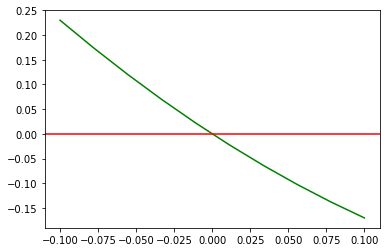

In [64]:
plt.plot(p1_space,p1_y, color='green')
plt.axhline(y=0.0, color='r', linestyle='-')

In [66]:
p2_space = np.linspace(1/3, 3/3, 10)
p2_y = 3*p2_space**2 - 2*p2_space

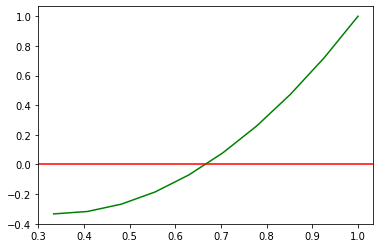

In [67]:
plt.plot(p2_space,p2_y, color='green')
plt.axhline(y=0.0, color='r', linestyle='-')

## Vi kan self√∏lgelig bruge SymPy til al differentering

In [68]:
from sympy import *

x = symbols('x')

#f = -(x**3)+3*x**2-1

f = x**3-x**2

f

x**3 - x**2

In [69]:
# üòé

f.diff()

3*x**2 - 2*x

In [70]:
fd = f.diff()

In [71]:
solveset(fd, x)

FiniteSet(0, 2/3)

In [73]:
sign_chart = [-1, -0.5, 0, 1/3, 2/3, 1, 1.5]

In [76]:
# list comprehension hvor vi beregner h√¶ldning for alle v√¶rdier i sign_chart
[fd.subs(x, i) for i in sign_chart]

[5, 1.75000000000000, 0, -0.333333333333333, 0, 1, 3.75000000000000]

In [77]:
# men ikke

fd.subs(x, 0)

0

## √òvelse

En virksomhed kan maximalt producere 1300 pumper af en specifik type per √•r. Hvor mange pumper skal produceres for at maksimere profit in DKK, som er givet ved:

$$ P = 60000000 - 720000x + 1500*x^2 - \frac{2}{3}x^3$$

L√∏s med SymPy


In [78]:
# definer funktion

x = symbols('x')
f = 60000000 - 720000*x + 1500*x**2 - (2/3*x**3)

f

-0.666666666666667*x**3 + 1500*x**2 - 720000*x + 60000000

In [79]:
# find f'(x)
fd = diff(f)
fd

-2.0*x**2 + 3000*x - 720000

In [81]:
# find ekstrempunkter 

solutions = solveset(fd, x)
solutions

FiniteSet(300.0, 1200.0)

In [82]:
sign_chart = [200, 300, 500, 1200, 1300]

In [83]:
[fd.subs(x, i) for i in sign_chart]

[-200000.000000000, 0, 280000.000000000, 0, -200000.000000000]

In [84]:
[f.subs(x, s) for s in solutions]

[-39000000.0000000, 204000000.000000]

In [85]:
# der skal produceres

pumper = 1200

#### Del 3.x - Opsummering
* En afledede funktion er h√¶ldningen af tangentlinjen p√• et hvilket som helst punkt langs en kurve.
* Lad $x$ v√¶re et punkt p√• kurven og $h$ v√¶re afstanden mellem to punkter, s√• er den matematiske formel for h√¶ldningen, n√•r $h$ n√¶rmer sig nul, givet som: $f'(x) = \lim_{h \to 0}\frac{f(x+h)-f(x)}{h}$
* Differientering er en proces for at finde en funktions afledede.
* For at finde afledede af: $f(x) = -(x)^2 + 3x -1$:
  * $y' = \lim_{h \to 0} \frac{(-(x + h)^2 + 3(x + h) - 1) - (-(x)^2 + 3x - 1)}{h}$
  * $y' = \lim_{h \to 0} \frac{-x^2 - 2xh - h^2 +3x + 3h - 1 + x^2 - 3x + 1}{h}$
  * $y' = \lim_{h \to 0} \frac{h(-2x - h+3)}{h}$
  * $y' = \lim_{h \to 0} -2x - h + 3$
  * $y' = 2x +3$
* Tre m√•der at annotere en kurves afledede:
  * $y' = -2x + 3$
  $f'(x) = -2x +3$ *Brug kun hvis derivativet er en funktion
  * $\frac{d}{dx}[-x^2 + 3x -1] = -2x + 3$
* Et kritisk punkt er et punkt, hvor h√¶ldningen √¶ndrer retning fra negativ h√¶ldning til positiv h√¶ldning eller omvendt. Kritiske punkter repr√¶senterer ekstreme v√¶rdier, som kan klassificeres som et minimum eller ekstrem v√¶rdi.
* Klassificering af kritisk punkt: 
  * N√•r h√¶ldningen √¶ndrer retning fra positiv til negativ, er det en maksimumsv√¶rdi.
  * N√•r h√¶ldningen √¶ndrer retning fra negativ til positiv, er det en minimumsv√¶rdi.
  * Hvis h√¶ldningen ikke √¶ndrer retning, som for eksempel ved $x = 0$ for $y = x^3$, kan det ikke v√¶re et minimum eller maksimumsv√¶rdi.
* Hvert maksimums- eller minimumv√¶rdipunkt er kendt som lokalt ekstremum.
* Klassificering af lokalt ekstrema:
  * Et punkt er et relativt minimum, hvis et kritisk punkt er det laveste punkt i et givet interval.
  * Et punkt er et relativt maksimum, hvis et kritisk punkt er det h√∏jeste punkt i et givet interval.
* I stedet for at bruge definitionen af afledede kan vi anvende nogle regler for let at beregne
de afledte funktioner.
* Regler: 
  * Power rule: Lad $r$ v√¶re en potens, s√• er $f'(x) = rx^{r-1}$
    * Eksempel: I vores funktion $f(x) = x^2$, vil vores $r$ v√¶re $2$. Ved at bruge power rule, ville den afledede v√¶re $f'(x) = 2x^{2-1}$, eller, $f'(x) =2x$.
  * Summeringsregel: $\frac {d}{dx} [f(x) + g(x)] = \frac {d}{dx} [f(x)] + \frac {d}{dx} [g(x)]$
    * Eksempel: $\frac {d}{dx} [-x^3 + x^2 ] =  \frac {d}{dx} [-x^3] + \frac {d}{dx} [x^2] = -3x^2 + 2x$
  * Konstant faktorregel: $\frac{d}{dx}[3x] = 3\frac{d}{dx}x = 3i = 3$
* Afledede af $x$ er altid $1$, og den afledede af $1$ er altid $0$  
* N√•r du har fundet de kritiske punkter i en funktion, kan du analysere h√¶ldningsretningen omkring punkterne ved hj√¶lp af et tegndiagram for at klassificere punktet som et minimum eller et maksimum. Vi kan teste punkter omkring vores interessepunkter for at se om der er et tegn√¶ndring s√•vel som hvad √¶ndringen er.

  
